<a href="https://colab.research.google.com/github/AnnaBo1/python_for_DA/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [4]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 55.7 MB/s eta 0:00:00


In [7]:
import mysql.connector
import datetime
import pandas as pd

In [8]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [19]:
query = """
SELECT YEAR(hire_date) AS hire_year, COUNT(emp_no) AS emp_num
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

In [20]:
import warnings
warnings.filterwarnings('ignore') #якщо не написати то у наступному запиті буде щось питсати знизу.

In [21]:
df = pd.read_sql(query, con)

In [22]:
df

,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [24]:
import matplotlib.pyplot as plt

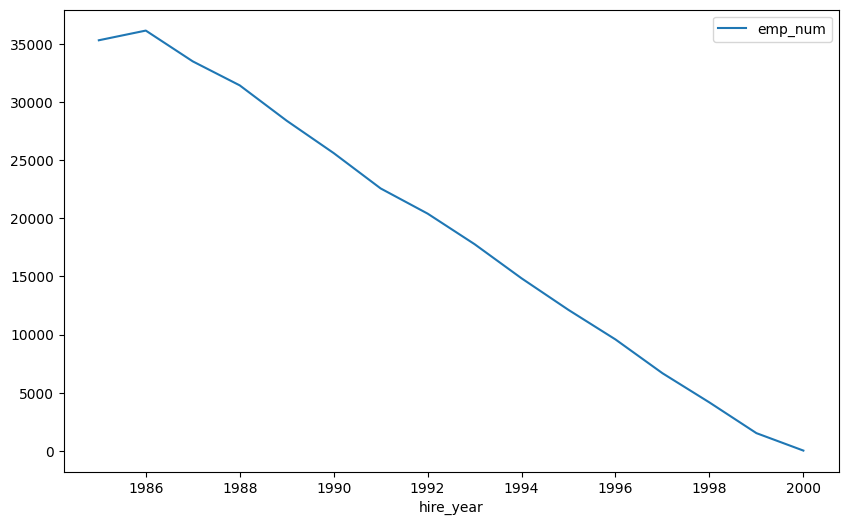

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['emp_num'], label='emp_num')

plt.xlabel('hire_year')
plt.legend()

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [51]:
query = """
SELECT from_date, to_date,
       TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration
FROM titles
WHERE title = 'Engineer'
  AND to_date != '9999-01-01';
"""
#TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration рахує кількість років перебування на позиції для кожного інженера.
#WHERE to_date != '9999-01-01' — умова для вибору лише тих співробітників, які більше не працюють

In [52]:
df_years = pd.read_sql(query, con)

In [53]:
df_years

,from_date,to_date,duration
0,1986-12-01,1995-12-01,9
1,1990-02-18,1995-02-18,5
2,1992-12-18,2000-12-18,8
3,1987-04-03,1995-04-03,8
4,1995-03-20,2001-03-19,5
...,...,...,...
84015,1989-11-23,1998-11-23,9
84016,1989-07-30,1994-07-30,5
84017,1993-02-22,1993-10-27,0
84018,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

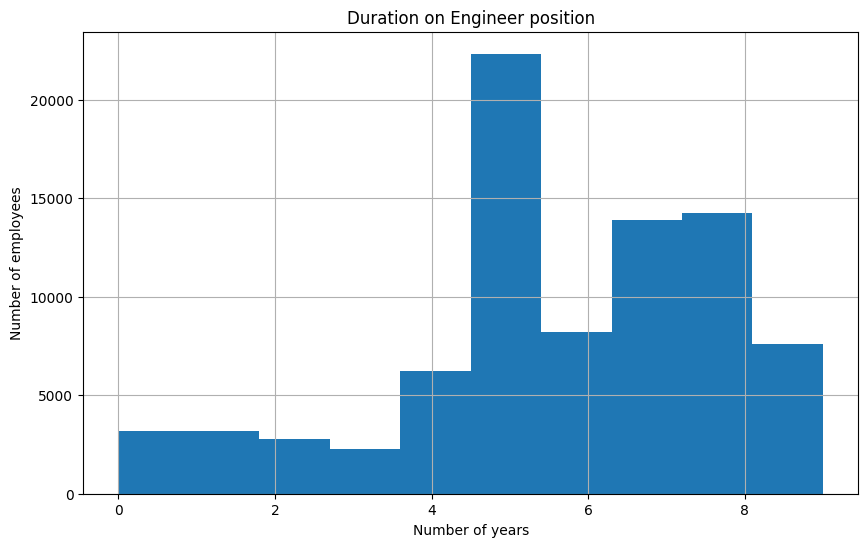

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration']) #обов'язково вказати в квадратних дужках ['duration'], бо будує гістограму на основі даних у колонці duration.

plt.title('Duration on Engineer position')
plt.xlabel('Number of years')
plt.ylabel('Number of employees')

plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [56]:
con.close()